# Домашняя работа №1

In [1]:
import numpy as np
import pylab as pl
import pandas as pd
import warnings
import math

from matplotlib import pyplot as plt
from scipy import linalg


warnings.filterwarnings("ignore")

## Задание 1

Изобразите с помощью matplotlib. Изобразите точку x + 2y + 3z. Найдите угол между векторами x, y и x, z. 

In [104]:
x = np.array([1,1])
y = np.array([2, 0])
z = np.array([0,2])

In [53]:
t = x + 2 * y + 3 * z
f = f't({t[0]},{t[1]})'
print(t)
print(f)

[5 7]
t(5,7)


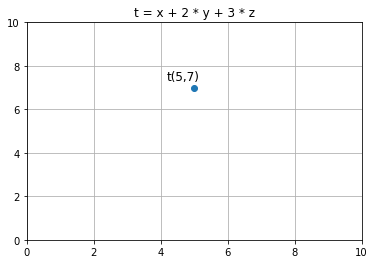

In [69]:
plt.scatter(t[0], t[1])

plt.annotate((f), (t[0], t[1]), fontsize=12, ha='right', textcoords='offset points')

plt.grid()

plt.xlim(0,10)
plt.ylim(0,10)

plt.title('t = x + 2 * y + 3 * z', fontsize=12)

plt.show()

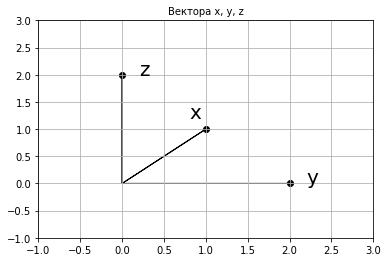

In [126]:
ax = plt.axes()

ax.arrow(0, 0, x[0], x[1])
ax.arrow(0, 0, y[0], y[1])
ax.arrow(0, 0, z[0], z[1])

plt.scatter(x[0],x[1],color='black')
plt.scatter(y[0],y[1],color='black')
plt.scatter(z[0],z[1],color='black')

ax.annotate('x', (x[0]-0.2,x[1]+0.2),fontsize=20)
ax.annotate('y', (y[0]+0.2,y[1]),fontsize=20)
ax.annotate('z', (z[0]+0.2,z[1]),fontsize=20)

plt.grid()

plt.xlim(-1,3)
plt.ylim(-1,3)

plt.title('Вектора x, y, z',fontsize=10)

plt.show()


In [128]:
import scipy.spatial.distance

Угол между векторами x и y:

In [137]:
# Способ 1:
    
xy = np.array([x, y])
# Косинусное расстояние
dist = scipy.spatial.distance.pdist(xy, 'cosine')
# угол
angle_xy = np.rad2deg(np.arccos(1 - dist))
angle_xy

array([45.])

In [141]:
# Способ 2:

x_Length = np.linalg.norm( x )
y_Length = np.linalg.norm( y )

cos_ = np.dot( x, y ) / ( x_Length * y_Length )
ang = int(np.arccos( cos_ ) * 360 / 2 / np.pi)

print(f'Угол между векторами x и y составляет {ang} градусов')

Угол между векторами x и y составляет 45 градусов


Угол между векторами x и z:

In [142]:
# Способ 1:

xz = np.array([x, z])
# Косинусное расстояние
dist = scipy.spatial.distance.pdist(xz, 'cosine')
# угол
angle_xz = np.rad2deg(np.arccos(1 - dist))
angle_xz

array([45.])

In [143]:
# Способ 2:

x_Length = np.linalg.norm( x )
z_Length = np.linalg.norm( z )

cos_ = np.dot( x, z ) / ( x_Length * z_Length )
ang = int(np.arccos( cos_ ) * 360 / 2 / np.pi)

print(f'Угол между векторами x и z составляет {ang} градусов')

Угол между векторами x и z составляет 45 градусов


## Задание 2

Загрузите модель человека. Найдите расстояние от правой кисти до позвоночника

In [177]:
ns = ['type', 'x', 'y', 'z']
# read points for joints
dfJointsVertexes = pd.read_csv('joints.txt', sep=' ', names = ns)
axis_sort = 'x' 
df = dfJointsVertexes.sort_values(by=[axis_sort])

In [179]:
df

,type,x,y,z
21,v,-0.392414,0.045288,0.025403
20,v,-0.283883,0.219551,-0.024912
19,v,-0.163721,0.476657,-0.030335
18,v,-0.163721,0.476657,-0.030335
17,v,-0.163721,0.476657,-0.030335
7,v,-0.105431,-0.412672,-0.015059
8,v,-0.103304,-0.748699,-0.045038
22,v,-0.093564,-0.046249,-0.012199
5,v,-0.093564,-0.046249,-0.012199
6,v,-0.093564,-0.046249,-0.012199


In [180]:
axis_sort = 'x' 
df = dfJointsVertexes.sort_values(by=[axis_sort])

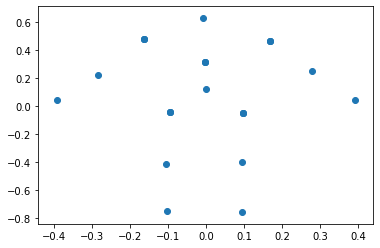

In [181]:
plt.scatter(df.x, df.y)

Считаем, что "человек" стоит к нам лицом:

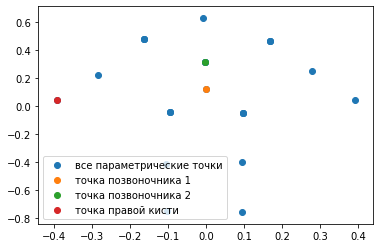

In [235]:
plt.scatter(df.x, df.y)

plt.scatter(df.x[0], df.y[0])
plt.scatter(df.x[9], df.y[9])
plt.scatter(df.x[21], df.y[21])
plt.legend(['все параметрические точки', 'точка позвоночника 1','точка позвоночника 2', 'точка правой кисти'])

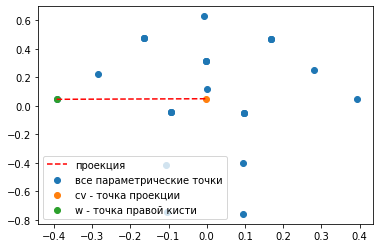

In [236]:
# вектор v - вектор позвоночника (составлен как разность одного вектора из другого)
v = np.array([df.x[9] - df.x[0], df.y[9] - df.y[0]])
# вектор w - вектор кисти
w = np.array([df.x[21],df.y[21]])

# строим проекцию данной точки w на вектор v: cv
cv = np.array(df.x[9], df.y[9]) + (np.dot(w,v))/np.dot(v,np.transpose(v))*v

# линия между v и cv
plt.plot([w[0],cv[0]],[w[1],cv[1]],'r--',linewidth=1.5)
plt.scatter(df.x, df.y)
plt.scatter(cv[0], cv[1])
plt.scatter(w[0], w[1])
plt.legend(['проекция', 'все параметрические точки', 'cv - точка проекции', 'w - точка правой кисти'])

In [232]:
dist = linalg.norm(cv - w)

In [234]:
print('Расстояние от точки правой кисти до позвоночника:', dist)

Расстояние от точки правой кисти до позвоночника: 0.3895781703281423


# Задание 3

Найдите собственные значения и собственные вектора матриц (необходимо решение на numpy). Для матрицы 3x3 можно посмотреть на корни характеристического многочлена, посчитанные в numpy.

In [144]:
m1 = np.array([[2, 2],
               [1, 3]])

m2 = np.array([[4, 1, -1],
               [1, 4, -1],
               [-1, -1, 4]])

In [157]:
w1, v1 = np.linalg.eig(m1)

In [172]:
print('Для матрицы m1:')
print('')
for i in range(len(w1)):
   
    print("Собственное значение " + str(w1[i]))
    print("соответствующий ему собственный вектор " + str(v1[:,i]))

Для матрицы m1:

Собственное значение 1.0
соответствующий ему собственный вектор [-0.89442719  0.4472136 ]
Собственное значение 4.0
соответствующий ему собственный вектор [-0.70710678 -0.70710678]


In [159]:
w2, v2 = np.linalg.eig(m2)

In [173]:
print('Для матрицы m2:')
print('')
for i in range(len(w2)):
    print("Собственное значение " + str(w2[i]))
    print("соответствующий ему собственный вектор " + str(v2[:,i]))

Для матрицы m2:

Собственное значение 2.999999999999999
соответствующий ему собственный вектор [-0.81649658  0.40824829 -0.40824829]
Собственное значение 5.999999999999997
соответствующий ему собственный вектор [ 0.57735027  0.57735027 -0.57735027]
Собственное значение 2.9999999999999996
соответствующий ему собственный вектор [-0.27658128  0.8035929   0.52701162]
